## SMS SPAM DETECTION
## Author-Rohan Rathi

SMS spam detection is the process of automatically identifying and filtering out unwanted or unsolicited text messages, commonly known as SMS spam. It uses machine learning algorithms and text analysis techniques to distinguish between legitimate messages and spam, protecting users from unwanted and potentially harmful content. This technology operates in real-time, scanning incoming text messages and classifying them as either spam or legitimate based on learned patterns and features. It often includes user feedback and rule-based filters to improve accuracy and adapt to evolving spamming methods. SMS spam detection is crucial for reducing annoyance and safeguarding users from spam-related threats.

Download Dataset here- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Import the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

## Import Data

In [17]:
data=pd.read_csv('spam.csv',encoding='latin-1')#It's commonly used when you encounter character encoding 
#issues, especially when dealing with text files that contain characters not representable in the 
# default encoding, which is often 'utf-8' in Python.

In [18]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Exploration And Cleaning

In [19]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
drop_columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}
data.drop(columns = drop_columns,axis=1,inplace=True)

In [21]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
#Renaming the names of the column to make it understand properly
names = {"v1":"Type(Ham/Spam)","v2":"email"}
data.rename(columns = names,inplace=True)
data

,Type(Ham/Spam),email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
data.head()

,Type(Ham/Spam),email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type(Ham/Spam)  5572 non-null   object
 1   email           5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
data.describe()

,Type(Ham/Spam),email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
#We will check for null values
data.isnull().sum()

Type(Ham/Spam)    0
email             0
dtype: int64

Here, we can see that there are no null values in the dataset

In [30]:
#We will check for NaN,none values
data.isna().sum()

Type(Ham/Spam)    0
email             0
dtype: int64

Also, there are no NaN,none values

In [31]:
#Now, We will check for duplicates
data.duplicated().sum()

403

As, we can see there are duplicates we need to remove them.

In [32]:
data.drop_duplicates(inplace=True)

In [34]:
data.describe()

,Type(Ham/Spam),email
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


Now, we can see that count is decreased from 5572 to 5169 since duplicates are removed

So, here we have a proper data now since we removed all null,NaN values and Duplicates. Hence, we can go for data visualization.

## Data Visualization

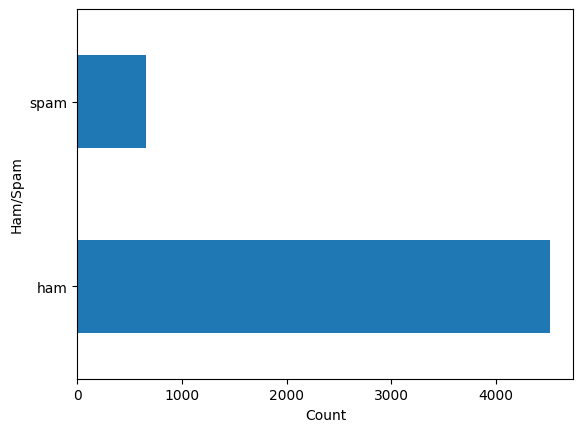

In [39]:
data['Type(Ham/Spam)'].value_counts().plot(kind='barh')  # Use 'barh' for a horizontal bar chart
plt.xlabel('Count')
plt.ylabel('Ham/Spam')
plt.show()

We can see that there are many spam values.Hence, we must know how to classify them.

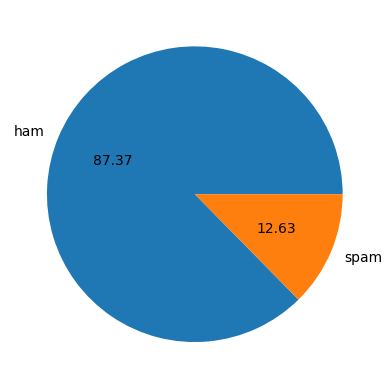

In [40]:
plt.pie(data['Type(Ham/Spam)'].value_counts(),labels=['ham','spam'],autopct='%0.2f')#Autopct allows us to display the percent value using string formatting.
plt.show()

So, we can see there are around 87% ham messages and 13% spam messages.

## Data Preprocessing

In [43]:
data['Spam'] = [0 if value=="ham" else 1 for value in data['Type(Ham/Spam)']]

In [44]:
data.head()

,Type(Ham/Spam),email,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


So, if email is a spam then it shows 0 whereas it shows 1 for ham in the spam column.

## Word Count

In [46]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['v2'].values)

# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)  # Remove URLs
all_text = re.sub(r'@\S+', '', all_text)     # Remove mentions
all_text = re.sub(r'#\S+', '', all_text)     # Remove hashtags

In [52]:
# Split the text into individual words
words = all_text.split()

The 'split()' method is used to split a string into a list of words based on whitespace (spaces or tabs) by default.

In [54]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

We remove the stop words by iterating through the list and keeping only the words that are not in the set of stop words.

In [55]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

Now, we have got the top 100 words by frequency

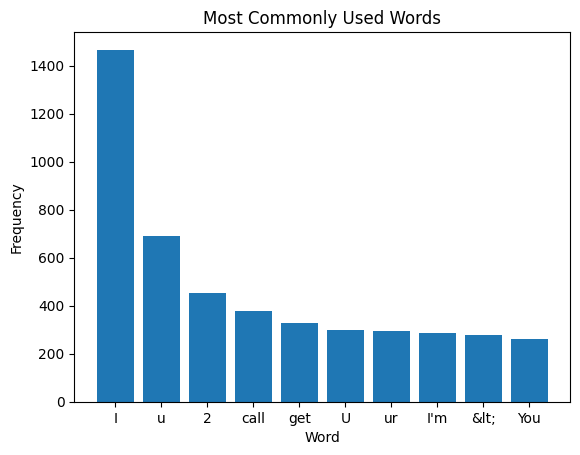

In [57]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Here is our bar plot which shows that most used top_word is 'I' which is used 1466 times.

## Natural Language Processing

## Data Cleaning

In [58]:
def clean_text(text):
    # Remove HTML tags using a regular expression
    text = re.sub(r'<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text using NLTK's word_tokenize
    words = nltk.word_tokenize(text)
    
    # Remove stopwords using NLTK's stopwords list
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words using NLTK's PorterStemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

In [64]:
from tqdm import tqdm
from nltk.stem import PorterStemmer
# Use tqdm to show progress
tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

100%|██████████| 5572/5572 [00:32<00:00, 169.69it/s]


## Splitting Data

In [66]:
X = data['email']
y = data['Type(Ham/Spam)']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

X_train and y_train are typically used for training, and X_test and y_test are used for evaluating the model's performance on unseen data.

## TF-IDF vectorizer for feature extraction

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_xt = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_fs = feature_xt.fit_transform(X_train)
X_test_fs = feature_xt.transform(X_test)

After running this code, we will have X_train_fs and X_test_fs containing the TF-IDF features of your training and testing text data, respectively. These features can be used as input for machine learning models for text classification or any other text-based analysis.

In [69]:
#Converting the sparse matrix to a dense array
X_train_fs = X_train_fs.toarray()
X_test_fs = X_test_fs.toarray()

# Building a Model

1. Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_fs,y_train)
y_pred = gnb.predict(X_test_fs)

After running this code, 'y_pred' will contain the predicted labels for the test data based on the trained Gaussian Naive Bayes classifier. You can then use various evaluation metrics to assess the classifier's performance on the test data.

In [72]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  88.00773694390716


2.Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_fs,y_train)
y_pred = lr.predict(X_test_fs)

After running this code, 'y_pred' will contain the predicted labels for the test data based on the trained logistic regression classifier. You can then use various evaluation metrics to assess the classifier's performance on the test data.

In [74]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  96.0348162475822


3.Support Vector Machine

In [75]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_fs,y_train)
y_pred = model.predict(X_test_fs)

After running this code, 'y_pred' will contain the predicted labels for the test data based on the trained Support Vector Classification (SVC) classifier. You can then use various evaluation metrics to assess the classifier's performance on the test data.

In [76]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  97.48549323017409


So, here we have found the accuracy using Naive Bayes, Logistic Regression, and Support Vector Machine(SVM).Using SVM, we get ~97.5% accuracy which is good whereas we get ~88% accuracy using naive bayes which is less compared to other two.

Hence, our ml model is ready which can classify SMS Messages as spam or legitimate. 

## Thankyou!!